# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

final threshold is 129.0
final threshold is 127.5
final threshold is 146.5
final threshold is 175.5


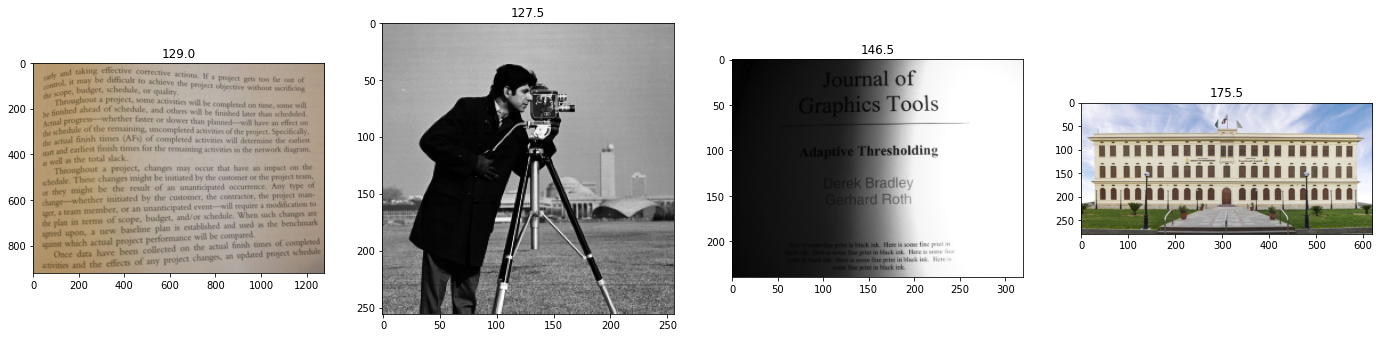

In [2]:
def getThreshold(img): 
    #convert the image to Uint8
    newImg = (img * 255).astype('uint8')
    #Get counts array that contains the number of pixels in each grey-level
    imgHist = np.array(np.histogram(newImg.flatten(), 255)[0])
    #total Number of pixels 
    totalNumberOfPixels = np.cumsum(imgHist)[-1]

    #Get initial threshold by getting the average mean of the pixels grey level

    init_threshold = np.round(np.sum(np.multiply(imgHist, np.arange(imgHist.shape[0]))) / totalNumberOfPixels)

    changed = True 
    # print(init_threshold)
    while(changed):
        #compute the average for the pixels with intensity less than what of init_threshold
        mean1 = np.round( np.sum(np.multiply(imgHist < init_threshold, np.arange((imgHist < init_threshold).shape[0]))) / np.cumsum(imgHist < init_threshold)[-1])

        #compute the average for the pixels with intensity more than what of init_threshold
        mean2 = np.round( np.sum(np.multiply(imgHist > init_threshold, np.arange((imgHist > init_threshold).shape[0]))) /np.cumsum(imgHist > init_threshold)[-1])

        #update the new threshold to be the average of the two means
        if((mean1 + mean2) / 2 != init_threshold):
            init_threshold = (mean1 + mean2) / 2
            changed = True
        else :
            changed = False
    print('final threshold is' , init_threshold) 
    
    return init_threshold
        
    

myimg = io.imread('./book1.jpg')
myimg2 = io.imread('./cameraman.jpg')
myimg3 = io.imread('./book.jpg')
myimg4 = io.imread('./cufe.jpg')
show_images(images= [myimg, myimg2, myimg3, myimg4], titles=[ getThreshold(myimg),getThreshold(myimg2),getThreshold(myimg3),getThreshold(myimg4),
])

    

    
    